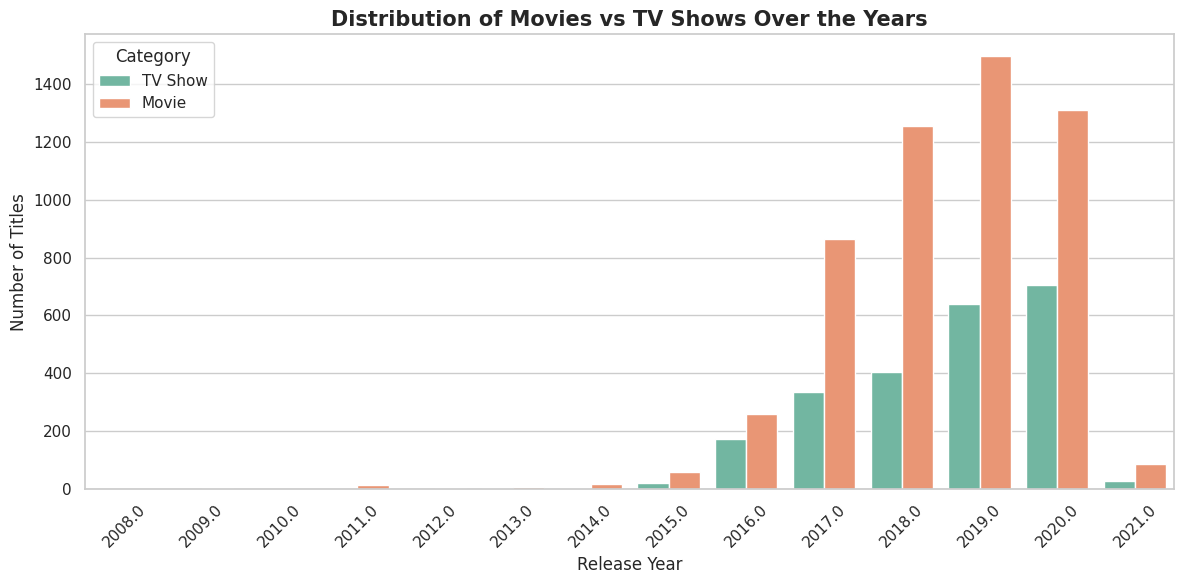

/tmp/ipython-input-2108213724.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='coolwarm')


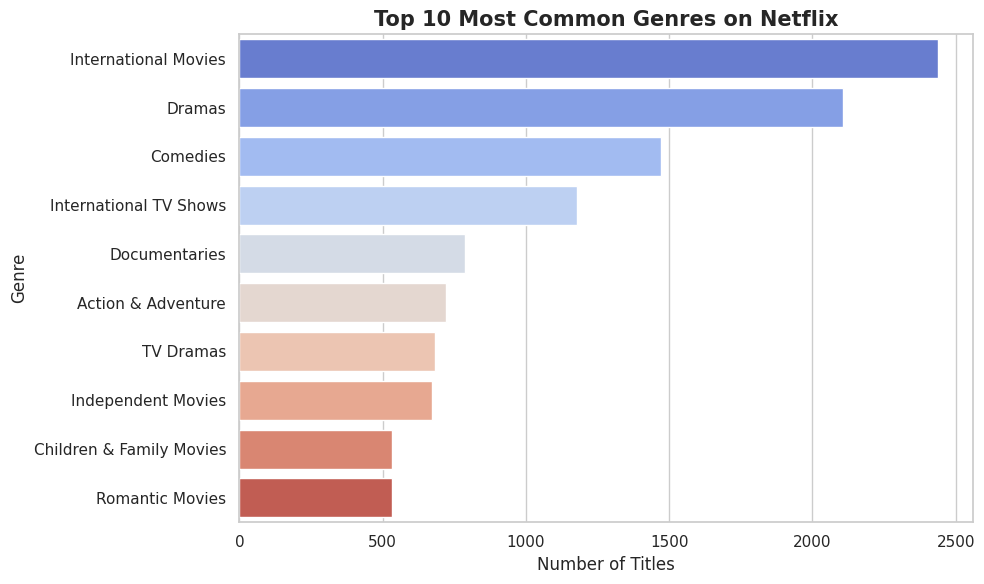

/tmp/ipython-input-2108213724.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


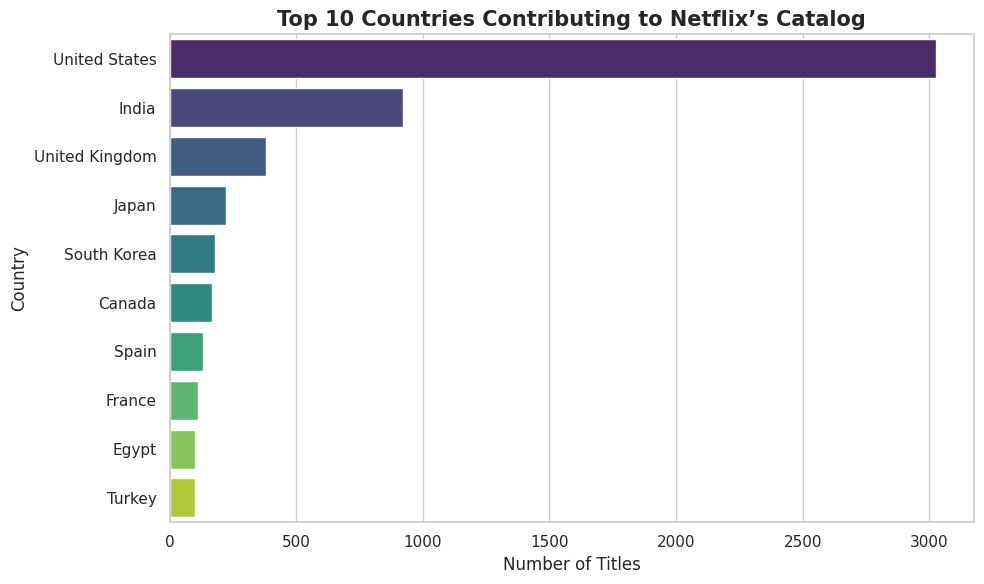

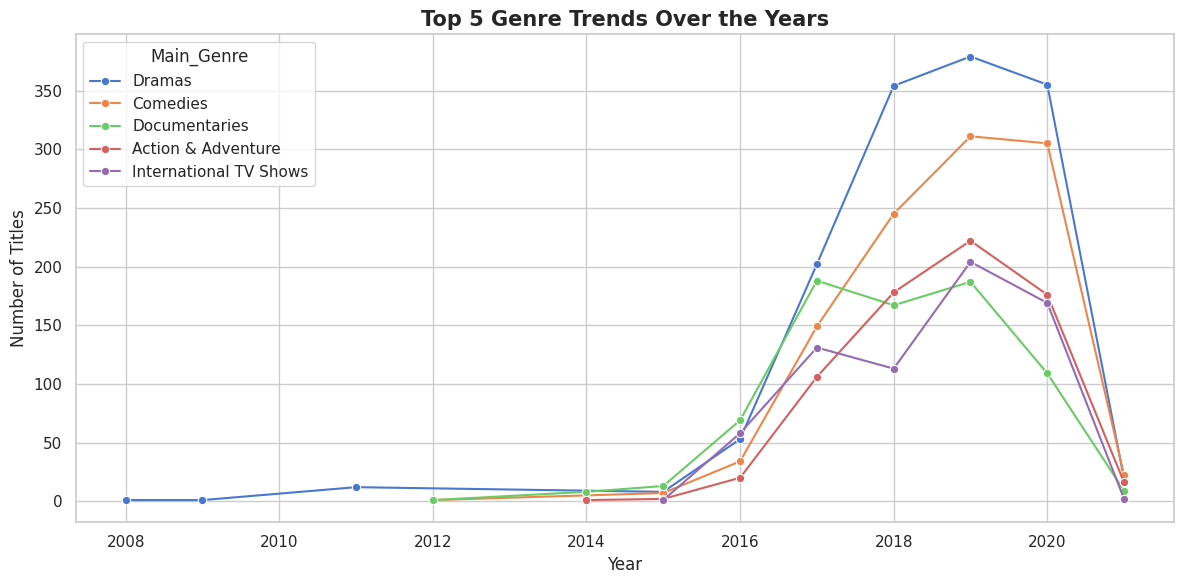


✅ EXPECTED OUTCOMES AND STRATEGIC INSIGHTS:

1. **Netflix Content Evolution**
   - Clear evidence of how Netflix’s content strategy evolved over the years.
   - Initially, Netflix focused on movies but gradually expanded its TV show portfolio.

2. **Top-Performing Genres**
   - Dominant genres include Drama, Comedy, and Documentaries.
   - Genres like International TV and Action have seen steady growth in recent years.

3. **Country Contributions**
   - The United States remains the top contributor, followed by India, the U.K., and Japan.
   - Indicates strong regional diversification in Netflix’s content library.

4. **Strategic Recommendations**
   - 📈 **Increase investment** in fast-growing genres (e.g., documentaries, international TV).
   - 🌍 **Expand collaborations** with emerging content-producing countries.
   - 🎬 **Balance strategy** between Movies and TV Shows based on viewer demand trends.
   - 🔍 **Leverage analytics** to predict which genres or countries will drive future 

In [ ]:
# ---------------------------------------------
# 📊 Netflix Content Strategy Evolution Analysis
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set plot style
sns.set(style="whitegrid", palette="muted")

# ---------------------------------------------
# 1️⃣ Load Dataset
# ---------------------------------------------
file_path = "Netflix_Cleaned.csv"   # Ensure this file is uploaded to your environment
df = pd.read_csv(file_path)

# Convert Release_Date to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

# Filter out invalid years (like NaN or very old)
df = df[df['Year'].between(2000, 2025, inclusive='both')]

# ---------------------------------------------
# 2️⃣ Distribution of Movies vs TV Shows over the years
# ---------------------------------------------
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Year', hue='Category', palette='Set2')
plt.title('Distribution of Movies vs TV Shows Over the Years', fontsize=15, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper left')
plt.tight_layout()
plt.show()

# Insight: This visualization shows Netflix’s shifting focus between movies and TV shows over time.

# ---------------------------------------------
# 3️⃣ Most Common Genres and Their Popularity
# ---------------------------------------------
# Split multiple genres and count frequency
genre_list = df['Type'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
genre_count = Counter([genre for sublist in genre_list for genre in sublist])
top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=15, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Insight: This helps identify dominant genres (e.g., Dramas, Comedies, Documentaries, etc.)

# ---------------------------------------------
# 4️⃣ Country-wise Contributions to Netflix Catalog
# ---------------------------------------------
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries Contributing to Netflix’s Catalog', fontsize=15, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Insight: This shows which countries produce the most Netflix content (like the U.S., India, U.K., etc.)

# ---------------------------------------------
# 5️⃣ Trend: How Popular Genres Changed Over the Years
# ---------------------------------------------
# Extract main genre from Type column (first listed genre)
df['Main_Genre'] = df['Type'].apply(lambda x: str(x).split(',')[0] if pd.notnull(x) else 'Unknown')

genre_year = df.groupby(['Year', 'Main_Genre']).size().reset_index(name='Count')
top5_genres = genre_year.groupby('Main_Genre')['Count'].sum().nlargest(5).index
trend_df = genre_year[genre_year['Main_Genre'].isin(top5_genres)]

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='Year', y='Count', hue='Main_Genre', marker='o')
plt.title('Top 5 Genre Trends Over the Years', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

# Insight: Displays how the popularity of top genres evolved across time.

# ---------------------------------------------
# 6️⃣ Expected Outcomes and Strategic Insights
# ---------------------------------------------
print("""
✅ EXPECTED OUTCOMES AND STRATEGIC INSIGHTS:

1. **Netflix Content Evolution**
   - Clear evidence of how Netflix’s content strategy evolved over the years.
   - Initially, Netflix focused on movies but gradually expanded its TV show portfolio.

2. **Top-Performing Genres**
   - Dominant genres include Drama, Comedy, and Documentaries.
   - Genres like International TV and Action have seen steady growth in recent years.

3. **Country Contributions**
   - The United States remains the top contributor, followed by India, the U.K., and Japan.
   - Indicates strong regional diversification in Netflix’s content library.

4. **Strategic Recommendations**
   - 📈 **Increase investment** in fast-growing genres (e.g., documentaries, international TV).
   - 🌍 **Expand collaborations** with emerging content-producing countries.
   - 🎬 **Balance strategy** between Movies and TV Shows based on viewer demand trends.
   - 🔍 **Leverage analytics** to predict which genres or countries will drive future engagement.
""")
